#Machine Learning Applied in the Evaluation of Airport Projects# 
#SITRAER 2022#

Universidade Federal de Pernambuco (UFPE)

Data: Agosto / 2022

Autores:
*   Ítalo Guedes - italo.guedes@ufpe.br
*   Max Andrade - max.andrade@ufpe.br 
*   Cleber Zanchettin - cz@cin.ufpe.br 


#Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

#Importação do Dataset (Excel)

In [ ]:
df = pd.read_csv('/content/sample_data/DATASET_TPS_.csv', delimiter=';')
df.head()

,largura_check-in,comprimento_check-in,largura_fila embarque,comprimento_fila embarque,status
0,4.0,5.0,7.0,11.0,NÃO APTO
1,5.0,2.0,6.0,20.0,NÃO APTO
2,8.0,3.0,3.0,25.0,NÃO APTO
3,15.0,2.0,3.0,11.0,NÃO APTO
4,13.0,5.0,7.0,21.0,APTO


#Visualização dos Dados

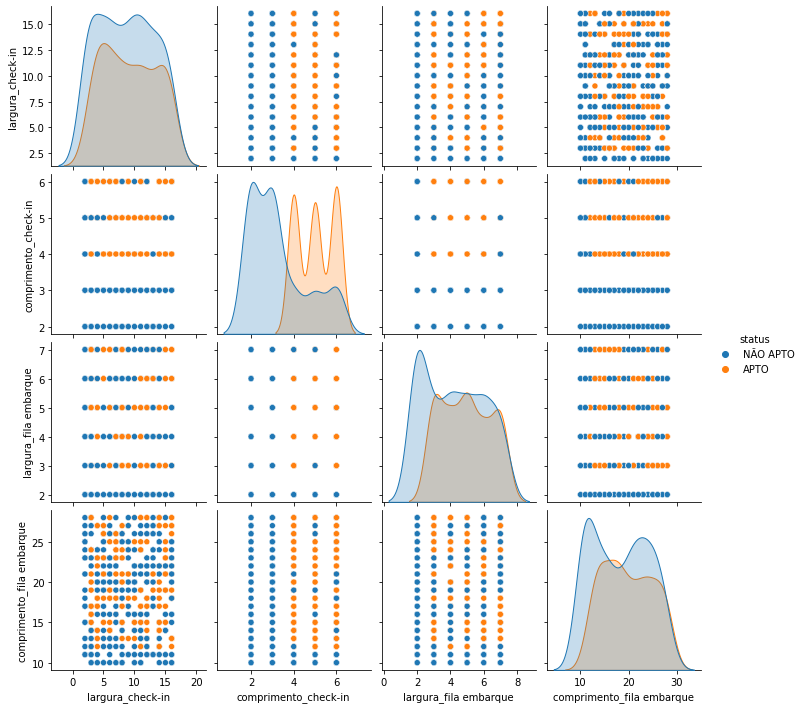

In [ ]:
sns.pairplot(df, hue='status')
plt.show()

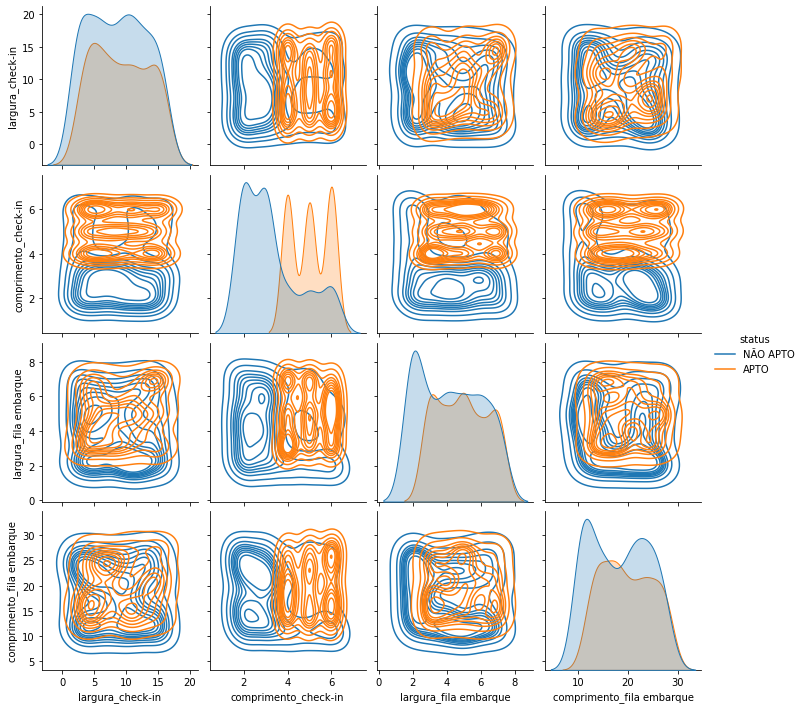

In [ ]:
sns.pairplot(df, hue='status', kind='kde')
plt.show()

#Separando *inputs* e *outputs*

In [ ]:
X = df.drop('status', axis=1)
y = df.status
X

,largura_check-in,comprimento_check-in,largura_fila embarque,comprimento_fila embarque
0,4.0,5.0,7.0,11.0
1,5.0,2.0,6.0,20.0
2,8.0,3.0,3.0,25.0
3,15.0,2.0,3.0,11.0
4,13.0,5.0,7.0,21.0
...,...,...,...,...
495,8.0,4.0,3.0,13.0
496,6.0,3.0,6.0,11.0
497,9.0,2.0,2.0,16.0
498,16.0,6.0,6.0,13.0


#Normalizando os Dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)
X_norm

array([[0.14285714, 0.75      , 1.        , 0.05555556],
       [0.21428571, 0.        , 0.8       , 0.55555556],
       [0.42857143, 0.25      , 0.2       , 0.83333333],
       ...,
       [0.5       , 0.        , 0.        , 0.33333333],
       [1.        , 1.        , 0.8       , 0.16666667],
       [0.57142857, 0.5       , 0.6       , 0.27777778]])

#Implementando o algoritmo KNN

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Configurando o classificador Decision Tree (profundidade, nº de folhas)

In [ ]:
dt = DecisionTreeClassifier (max_depth=3, max_leaf_nodes=4)

In [ ]:
print(dt.get_depth())
print(dt.get_n_leaves())

3
4


#Separando conjunto de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#criando variáveis (treino e teste)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=2/3)

#Avaliando a acurácia do algoritmo Decision Tree

In [ ]:
dt.fit(X_train, y_train)

accuracy_score(y_test, dt.predict(X_test))

0.9940119760479041

In [ ]:
resultado_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, resultado_dt))

              precision    recall  f1-score   support

        APTO       0.99      1.00      0.99        80
    NÃO APTO       1.00      0.99      0.99        87

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167



#Avaliando o classificador (a partir de um novo projeto)

In [ ]:
novo_projeto = [[5.00, 8.00, 20.00, 20.00]]
X_new = minmax.transform(novo_projeto)
X_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.21428571, 1.5       , 3.6       , 0.55555556]])

In [ ]:
dt.predict(X_new)

array(['APTO'], dtype=object)